In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
dataset = '/content/drive/MyDrive/Data/'

In [4]:
LR = 1e-3
EPOCHS = 10
BS = 8

In [5]:
args = {} #dictionary
args["dataset"] = dataset #dataset stored in key location 

In [6]:
args

{'dataset': '/content/drive/MyDrive/Data/'}

In [7]:
import numpy as np
import cv2
import os
from imutils import paths
iPaths = list(paths.list_images(args["dataset"])) #extracting images from paths in iPaths
data=[]  #store image in this list
labels=[]  #store labels(covid,pneumonia) in this list

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]  #split dataset using path separtaion of covid and pneumonia
    image = cv2.imread(iPath)         #reading image from iPath and converting into array
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224)) #resizing images
    data.append(image)
    labels.append(label)
data = np.array(data)/255.0 #maximum pixel value=255, converting data to numpy array
labels = np.array(labels)

In [8]:
image

array([[[127, 127, 127],
        [125, 125, 125],
        [121, 121, 121],
        ...,
        [152, 152, 152],
        [149, 149, 149],
        [147, 147, 147]],

       [[133, 133, 133],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [142, 142, 142],
        [141, 141, 141],
        [136, 136, 136]],

       [[138, 138, 138],
        [134, 134, 134],
        [132, 132, 132],
        ...,
        [138, 138, 138],
        [132, 132, 132],
        [129, 129, 129]],

       ...,

       [[163, 163, 163],
        [165, 165, 165],
        [174, 174, 174],
        ...,
        [151, 151, 151],
        [143, 143, 143],
        [135, 135, 135]],

       [[162, 162, 162],
        [166, 166, 166],
        [174, 174, 174],
        ...,
        [151, 151, 151],
        [143, 143, 143],
        [135, 135, 135]],

       [[163, 163, 163],
        [165, 165, 165],
        [172, 172, 172],
        ...,
        [150, 150, 150],
        [143, 143, 143],
        [134, 134, 134]]

In [9]:
image.shape

(224, 224, 3)

In [10]:
data

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.23529412, 0.23529412, 0.23529412],
         [0.21568627, 0.21568627, 0.21568627],
         [0.21176471, 0.21176471, 0.21176471]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.22745098, 0.22745098, 0.22745098],
         [0.20784314, 0.20784314, 0.20784314],
         [0.21176471, 0.21176471, 0.21176471]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.25098039, 0.25098039, 0.25098039],
         [0.25098039, 0.25098039, 0.25098039],
         [0.22352941, 0.22352941, 0.22352941]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [11]:
labels

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Norm

Normal Chest X-ray Vs Covid-19 Chest X-ray


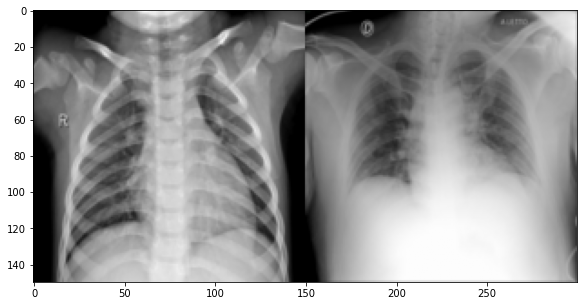

Normal Chest X-ray Vs Covid-19 Chest X-ray


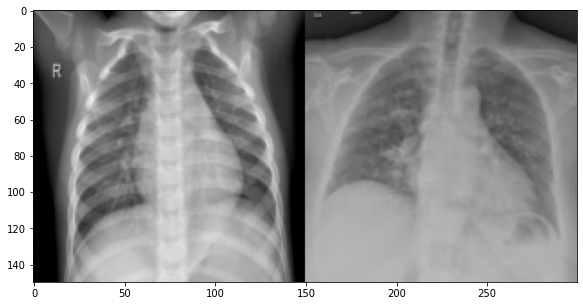

Normal Chest X-ray Vs Covid-19 Chest X-ray


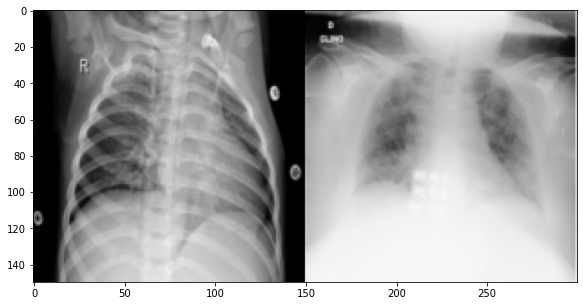

Normal Chest X-ray Vs Covid-19 Chest X-ray


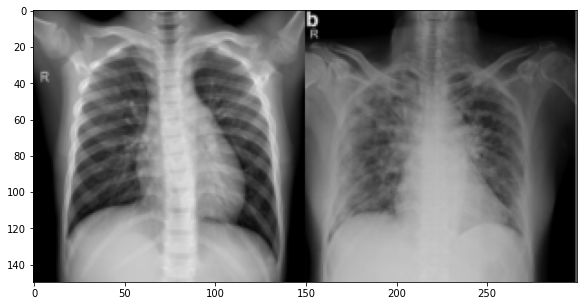

Normal Chest X-ray Vs Covid-19 Chest X-ray


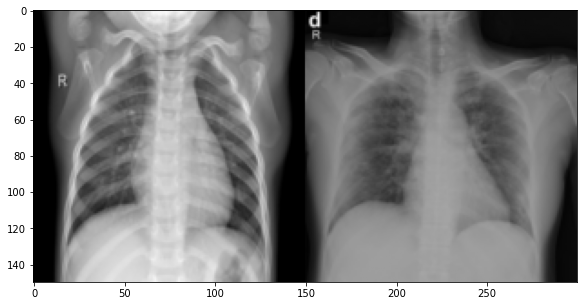

In [12]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
import os
Cimages = os.listdir(dataset +"Covid")
Nimages = os.listdir(dataset +"Normal")
def plotter(i):
    normal = cv2.imread(dataset+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(dataset+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [13]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels) #one hot encoding to transform labeled data in one hot vector for using into models for training.
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [14]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=42) #X_train,X_test has iamge data and
#Y_train,Y_test has labels data
train_augment = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [15]:
bmodel = VGG16(weights='imagenet', include_top=False,input_tensor=Input(shape=(224,224,3)))
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [16]:
hModel = bmodel.output
hModel = AveragePooling2D(pool_size=(4,4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64,activation='relu')(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2,activation='softmax')(hModel)

model = Model(inputs=bmodel.input,outputs=hModel)
for layer in bmodel.layers:
    layer.trainable = False

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


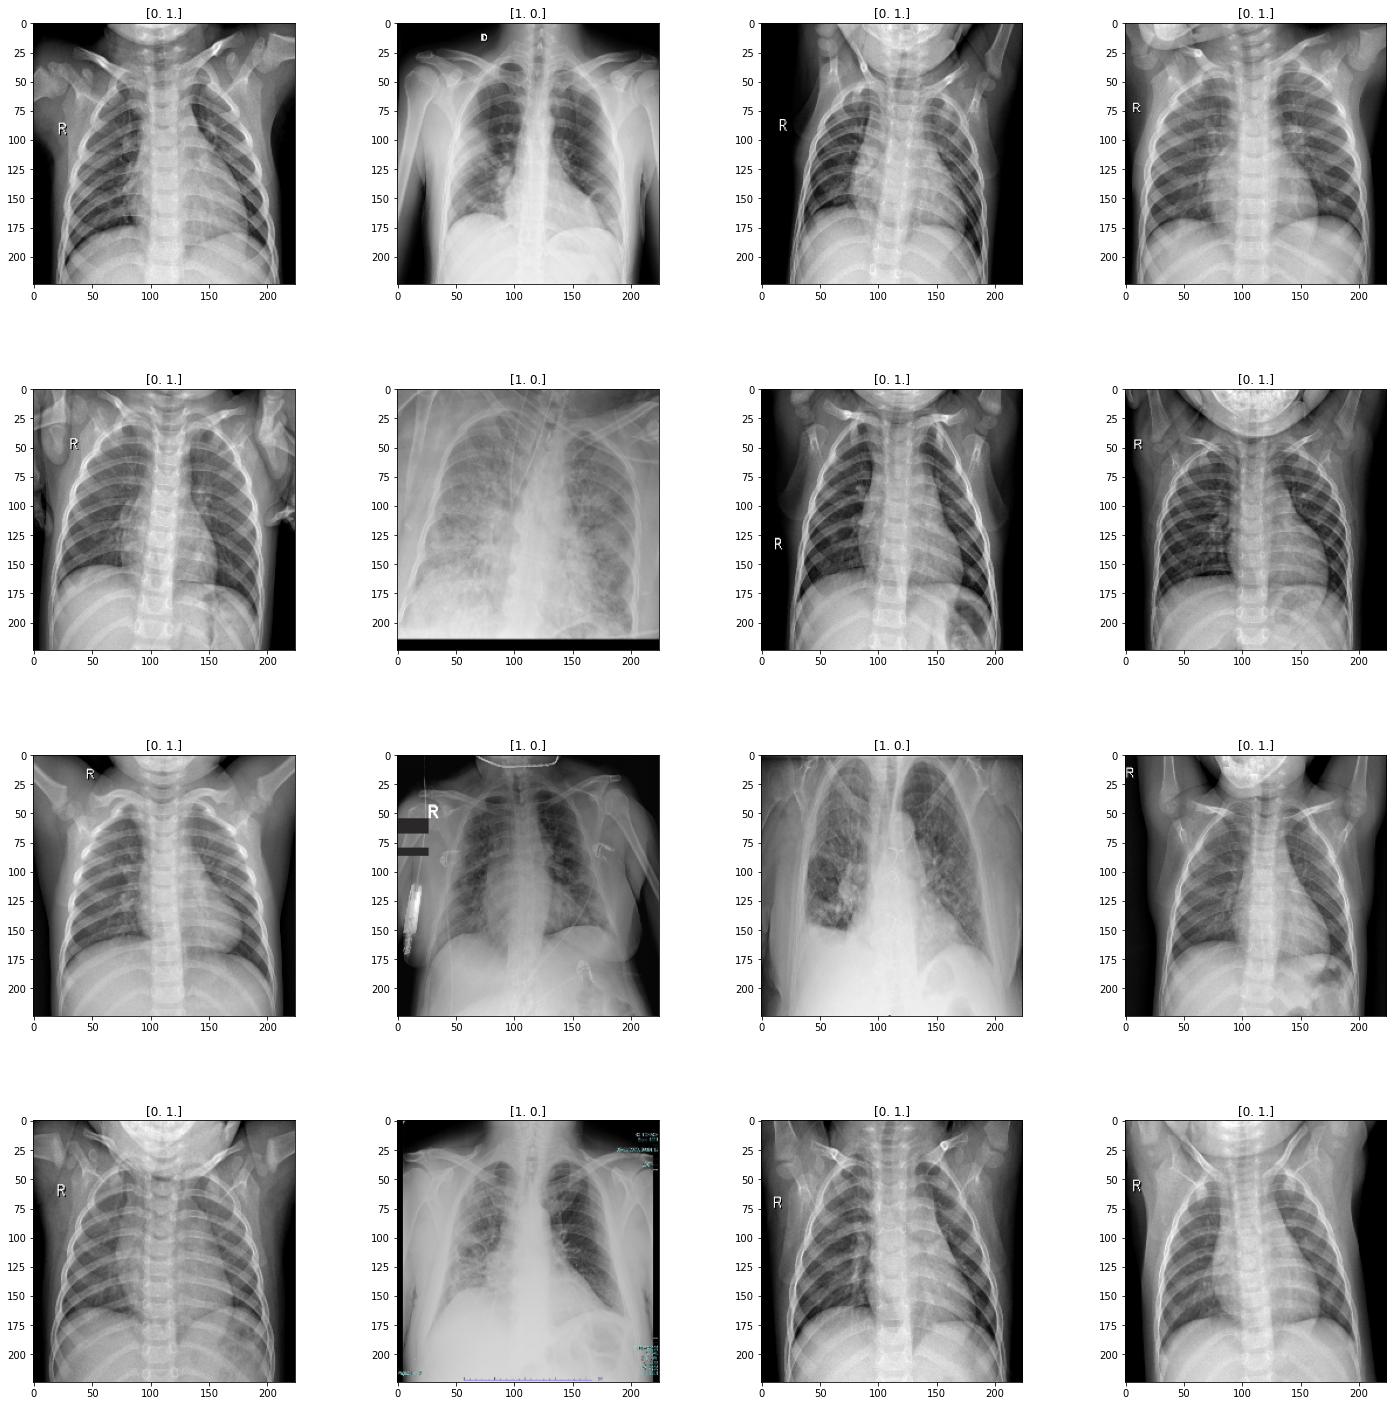

In [18]:
W_grid = 4 #width
L_grid = 4 #length
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()     #ravel is a numpy function used to convert multi dimensional array into flattened array
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index]) #show images
    axes[i].set_title(Y_train[index]) #show labels as title
    #axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [20]:
opt = Adam(lr=LR,decay=LR/EPOCHS)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
print("Compiling Started")
R= model.fit_generator(train_augment.flow(X_train,Y_train,batch_size=BS),steps_per_epoch=len(X_train)/BS,validation_data=(X_test,Y_test),validation_steps=len(X_test)/BS,epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Compiling Started
Epoch 1/10
20/20 [==============================] - 103s 5s/step - loss: 0.7248 - accuracy: 0.5562 - val_loss: 0.5944 - val_accuracy: 0.9750
Epoch 2/10
20/20 [==============================] - 102s 5s/step - loss: 0.6107 - accuracy: 0.7437 - val_loss: 0.4872 - val_accuracy: 0.9750
Epoch 3/10
20/20 [==============================] - 102s 5s/step - loss: 0.5190 - accuracy: 0.8375 - val_loss: 0.4099 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 102s 5s/step - loss: 0.4156 - accuracy: 0.9500 - val_loss: 0.3260 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 101s 5s/step - loss: 0.3527 - accuracy: 0.9375 - val_loss: 0.2618 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 101s 5s/step - loss: 0.2955 - accuracy: 0.9438 - val_loss: 0.2134 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 102s 5s/step - loss: 0.2685 - accuracy: 0.9625 - val_loss: 0.1766 - val_accuracy: 1.

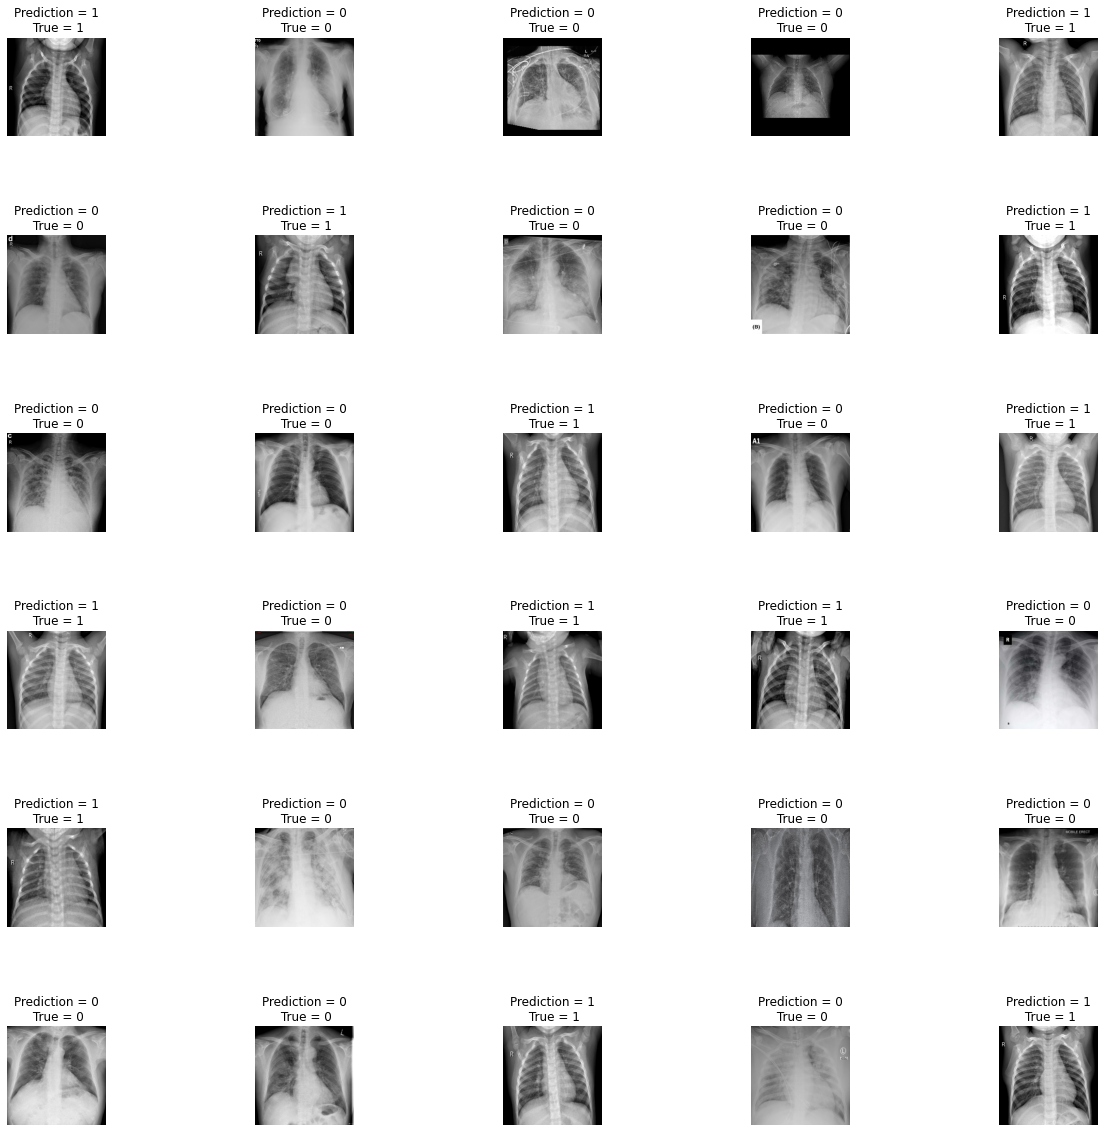

In [22]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)

In [25]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test,batch_size=BS)
y_pred = np.argmax(y_pred,axis=1)   #The np.argmax() function returns indices of the max element of the array in a particular axis. Syntax : numpy.argmax(array, axis = None, out = None)
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(Y_test.argmax(axis=1),y_pred)

In [ ]:
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
#total = sum(sum(cm))
#acc = (cm[0, 0] + cm[1, 1]) / total
#sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
#specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
#print(cm)
#print("acc: {:.4f}".format(acc))
#print("sensitivity: {:.4f}".format(sensitivity))
#print("specificity: {:.4f}".format(specificity))

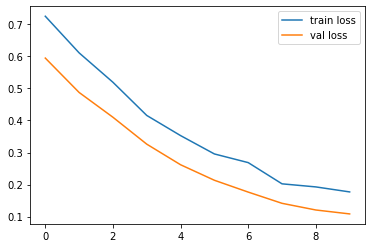

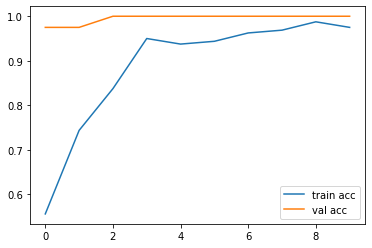

In [26]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
model.save('/content/drive/MyDrive/Covid_model.h5')

In [39]:
import tensorflow as tf
from keras.preprocessing import image
model = tf.keras.models.load_model('/content/drive/MyDrive/Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

Prediction: Covid


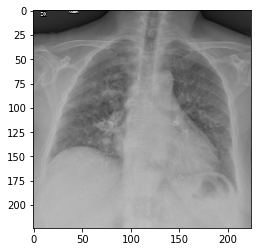

In [40]:
img = image.load_img('/content/drive/MyDrive/Data/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg',target_size=(224,224))
img_plot = plt.imshow(img)
#now converting image to numbers so that model can understand it
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x) #to make pixels small
classes = model.predict(img_data)
New_pred = np.argmax(classes,axis=1)
if New_pred ==[1]:
  print("Prediction: Normal")
else:
  print("Prediction: Covid")

Prediction: Normal


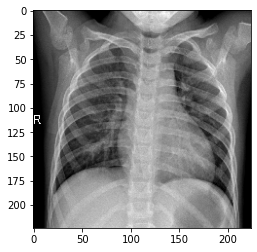

In [41]:
img = image.load_img('/content/drive/MyDrive/Data/Normal/IM-0162-0001.jpeg',target_size=(224,224))
img_plot = plt.imshow(img)
#now converting image to numbers so that model can understand it
x= image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x) #to make pixels small
classes = model.predict(img_data)
New_pred = np.argmax(classes,axis=1)
if New_pred ==[1]:
  print("Prediction: Normal")
else:
  print("Prediction: Covid")